# Time Series Analysis

**Contents**

1. Data ETL | Processing
2. Modeling
3. Evaluation

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts.timeseries import TimeSeries

from components import config
from components.ts_logger import logger
from components.utils import get_csv_dataframe

## 1. Data ETL | Processing

- Parse CSV Data
- Missing Values ?
- Stationarity ?

### Parse CSV Data

In [23]:
energy_load = [
    config.io_paths["DATASET_EC_LOAD_17"],
    config.io_paths["DATASET_EC_LOAD_18"],
    config.io_paths["DATASET_EC_LOAD_19"],
]

air_temperature = [
    config.io_paths["DATASET_TEMP_AIR_17"],
    config.io_paths["DATASET_TEMP_AIR_18"],
    config.io_paths["DATASET_TEMP_AIR_19"],
]

load_df = pd.concat([
    pd.read_csv(
        energy_load[i], index_col=[0], skiprows=[1],
    ) for i in range(len(energy_load))
])
temp_df = pd.concat([
    pd.read_csv(
        air_temperature[i], index_col=[0], skiprows=[1]
    ) for i in range(len(air_temperature))
])
logger.info(">> dataset loaded 2017-2019 and concatenated")

load_df.index = pd.to_datetime(load_df.index)
load_df = load_df.resample('H').sum(min_count=1)
logger.info(">> dataset resampled to hourly")

# load_df["Temperature"] = temp_df["value"].to_list()
# load_df = load_df[["Load", "Temperature"]]
# logger.info(">> hourly temperature added to dataframe")

load_series = TimeSeries.from_dataframe(load_df)
logger.info(">> darts time series of type {} created".format(load_series.__class__.__name__))

load_series.tail(5)

2024-01-26 08:36:37 [info     ] >> dataset loaded 2017-2019 and concatenated
2024-01-26 08:36:38 [info     ] >> dataset resampled to hourly


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


2024-01-26 08:36:38 [info     ] >> darts time series of type TimeSeries created


<TimeSeries (DataArray) (Date (UTC): 5, component: 1, sample: 1)>
array([[[208132.8]],

       [[195995.3]],

       [[188942.4]],

       [[187248.1]],

       [[179641. ]]])
Coordinates:
  * Date (UTC)  (Date (UTC)) datetime64[ns] 2019-12-31T18:00:00 ... 2019-12-3...
  * component   (component) object 'Load'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [13]:
from darts.models import (
    NaiveSeasonal,
    ExponentialSmoothing
)
from darts.utils.utils import (
    ModelMode,
    SeasonalityMode
)
from darts.metrics import mape


2024-01-26 08:17:23 [info     ] >> train set: 24936, valid set: 1344


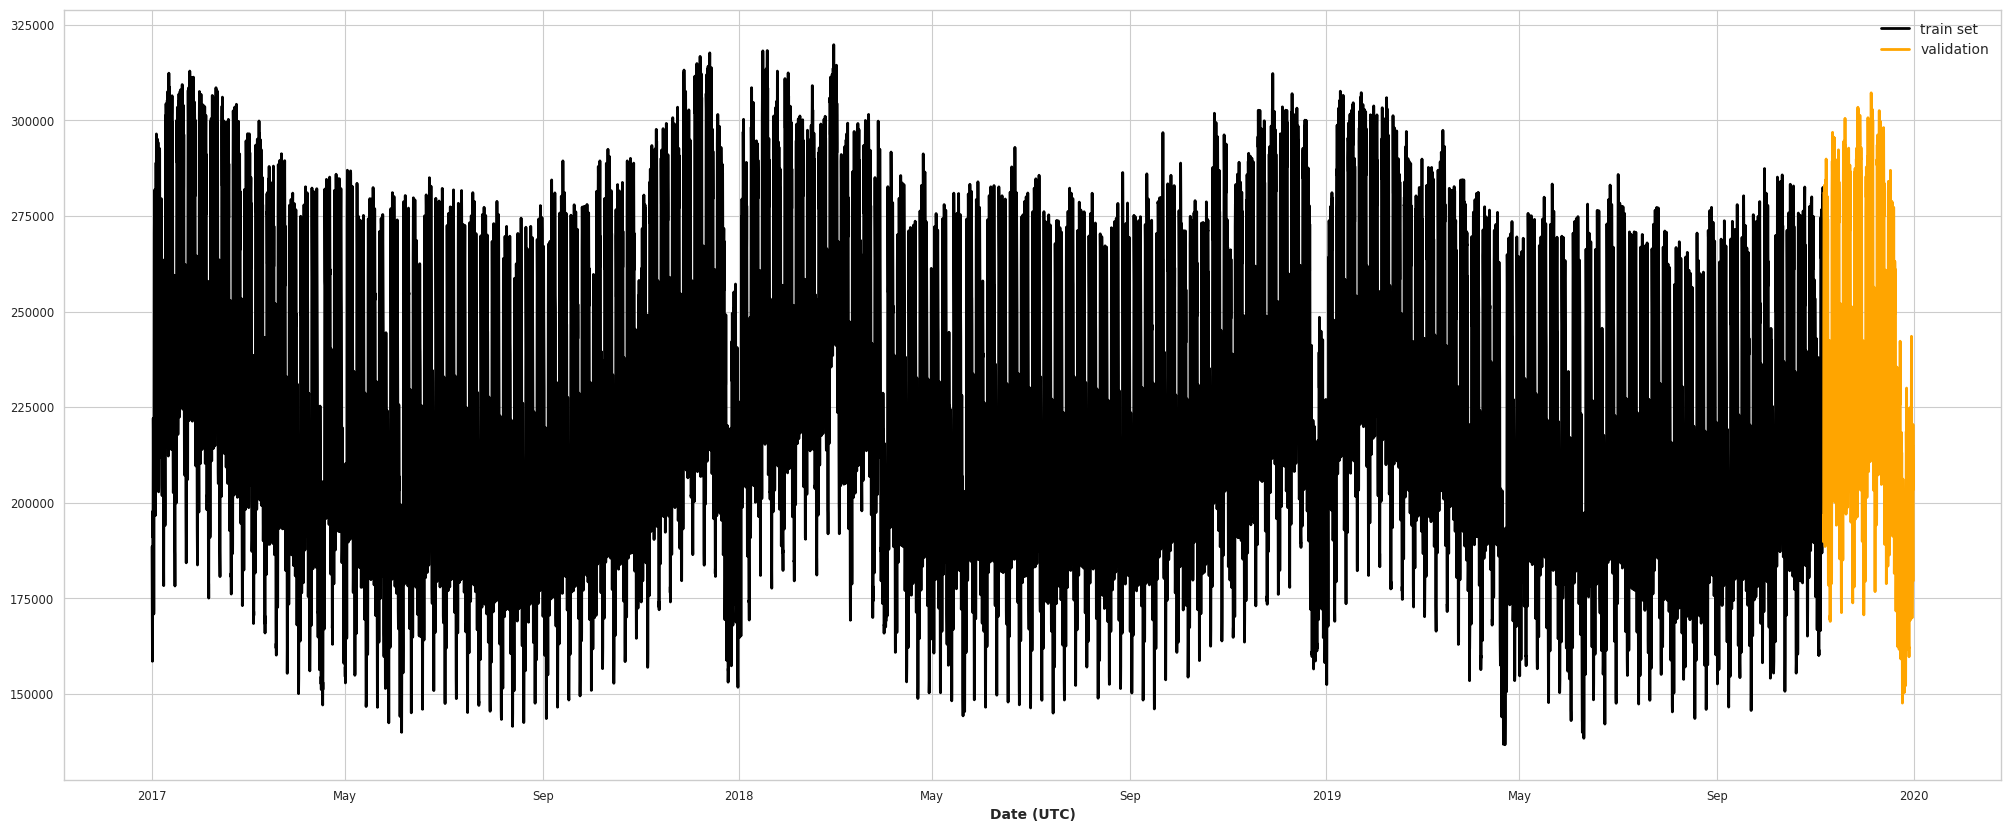

In [16]:
train_set, valid_set = load_series[:-24*7*8], load_series[-24*7*8:] # 8 weeks
logger.info(">> train set: {}, valid set: {}".format(len(train_set), len(valid_set)))

train_set.plot(label='train set')
valid_set.plot(label='validation', color='orange')
plt.show()